In [78]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [79]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [80]:
set_seeds()

In [81]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [82]:
a = a.reshape((len(a), 1))

In [83]:
a.shape

(100, 1)

In [84]:
a.shape

(100, 1)

In [85]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [86]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [87]:
lags = 3
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [88]:
list(g)[0]

(array([[[0],
         [1],
         [2]],
 
        [[1],
         [2],
         [3]],
 
        [[2],
         [3],
         [4]],
 
        [[3],
         [4],
         [5]],
 
        [[4],
         [5],
         [6]]]),
 array([[3],
        [4],
        [5],
        [6],
        [7]]))

In [89]:
print(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]), array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [90]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [91]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
history = model.fit_generator(g, epochs=1000, steps_per_epoch=5,
                              verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/937945699.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=1000, steps_per_epoch=5,


In [93]:
res = pd.DataFrame(history.history)

In [94]:
res.tail(3)

,loss,mae
997,1.100180,0.968589
998,1.179810,0.956990
999,0.309757,0.518061


<Axes: >

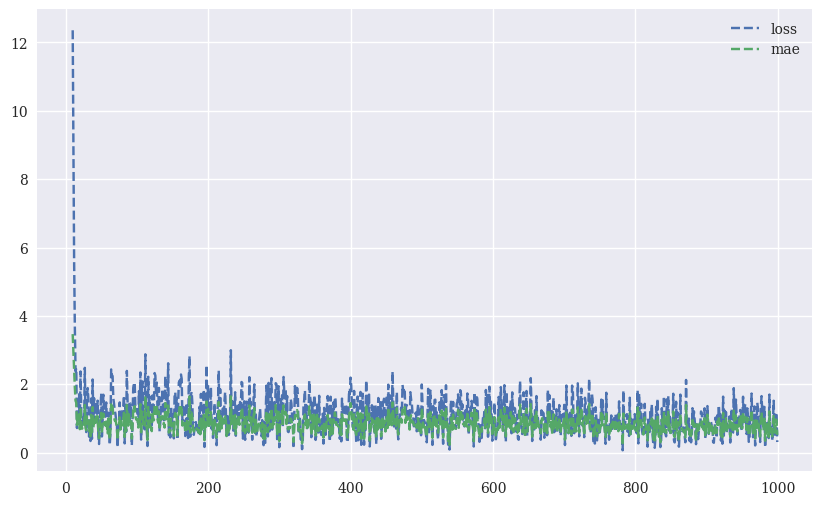

In [95]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--'])

In [96]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
x

array([[[21],
        [22],
        [23]]])

In [97]:
y = model.predict(x, verbose=False)
y

array([[22.7719]], dtype=float32)

In [98]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
x

array([[[87],
        [88],
        [89]]])

In [99]:
y = model.predict(x, verbose=False)
y

array([[90.5228]], dtype=float32)

In [100]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
x

array([[[187],
        [188],
        [189]]])

In [101]:
y = model.predict(x, verbose=False)
y

array([[193.1807]], dtype=float32)

In [102]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
x

array([[[1187],
        [1188],
        [1189]]])

In [103]:
y = model.predict(x, verbose=False)
y

array([[1219.76]], dtype=float32)

In [104]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [105]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

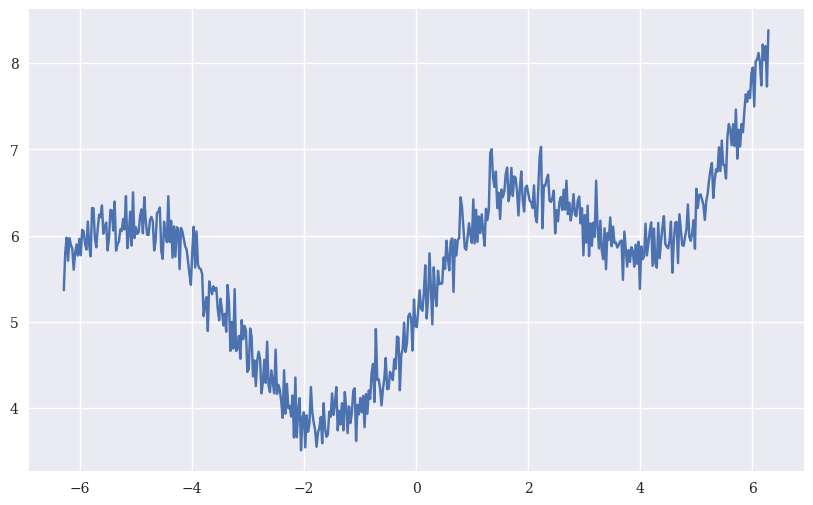

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(x, a)

In [107]:
a = a.reshape((len(a), -1))
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [108]:
lags = 5

In [119]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)
list(g)[0]

(array([[[5.3673],
         [5.8002],
         [5.9768],
         [5.7102],
         [5.9715]],
 
        [[5.8002],
         [5.9768],
         [5.7102],
         [5.9715],
         [5.8926]],
 
        [[5.9768],
         [5.7102],
         [5.9715],
         [5.8926],
         [5.8485]],
 
        [[5.7102],
         [5.9715],
         [5.8926],
         [5.8485],
         [5.6047]],
 
        [[5.9715],
         [5.8926],
         [5.8485],
         [5.6047],
         [5.7952]]]),
 array([[5.8926],
        [5.8485],
        [5.6047],
        [5.7952],
        [5.8985]]))

In [110]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 500)               251000    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 251501 (982.43 KB)
Trainable params: 251501 (982.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
history = model.fit_generator(g, epochs=500,
                    steps_per_epoch=10,
                    verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/1643734851.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=500,


In [113]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
x

array([-18.8496, -18.8118, -18.7741, -18.7363, -18.6986, -18.6609,
       -18.6231, -18.5854, -18.5477, -18.5099, -18.4722, -18.4345,
       -18.3967, -18.359 , -18.3212, -18.2835, -18.2458, -18.208 ,
       -18.1703, -18.1326, -18.0948, -18.0571, -18.0193, -17.9816,
       -17.9439, -17.9061, -17.8684, -17.8307, -17.7929, -17.7552,
       -17.7175, -17.6797, -17.642 , -17.6042, -17.5665, -17.5288,
       -17.491 , -17.4533, -17.4156, -17.3778, -17.3401, -17.3023,
       -17.2646, -17.2269, -17.1891, -17.1514, -17.1137, -17.0759,
       -17.0382, -17.0005, -16.9627, -16.925 , -16.8872, -16.8495,
       -16.8118, -16.774 , -16.7363, -16.6986, -16.6608, -16.6231,
       -16.5853, -16.5476, -16.5099, -16.4721, -16.4344, -16.3967,
       -16.3589, -16.3212, -16.2835, -16.2457, -16.208 , -16.1702,
       -16.1325, -16.0948, -16.057 , -16.0193, -15.9816, -15.9438,
       -15.9061, -15.8683, -15.8306, -15.7929, -15.7551, -15.7174,
       -15.6797, -15.6419, -15.6042, -15.5665, -15.5287, -15.4

In [114]:
d = transform(x)
d

array([19.1706, 19.4008, 19.2016, 18.8897, 19.2257, 18.5908, 19.6125,
       19.43  , 18.9547, 18.5864, 18.7631, 18.8504, 18.7521, 18.7945,
       18.837 , 18.4949, 18.5906, 18.5169, 18.545 , 18.6086, 18.0556,
       18.4269, 18.7201, 18.2545, 18.1107, 18.1251, 18.3644, 17.824 ,
       18.1864, 17.4579, 18.3619, 17.9994, 18.2414, 17.8104, 17.9298,
       18.3062, 17.5739, 17.9135, 17.2283, 17.1018, 17.7018, 17.5161,
       17.3508, 17.3896, 17.2279, 17.3306, 17.3622, 17.3413, 17.0821,
       17.1762, 17.0822, 16.9544, 16.7037, 16.1843, 16.6239, 16.5421,
       16.1941, 16.5969, 16.3646, 16.0147, 16.3789, 16.2843, 16.2809,
       15.731 , 15.9894, 15.6302, 15.1399, 15.5246, 15.4809, 15.8957,
       15.4385, 15.5754, 15.1108, 15.2926, 14.7967, 15.1563, 14.5991,
       15.0262, 14.648 , 14.4373, 14.2837, 14.5712, 14.1234, 14.2753,
       14.0218, 14.0722, 13.9534, 13.7351, 13.5722, 13.4226, 13.6869,
       13.5402, 13.7913, 13.3661, 12.8999, 13.4579, 12.8563, 13.151 ,
       12.8258, 12.9

In [115]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [116]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))
f

array([[[19.1706],
        [19.4008],
        [19.2016],
        [18.8897],
        [19.2257]],

       [[19.4008],
        [19.2016],
        [18.8897],
        [19.2257],
        [18.5908]],

       [[19.2016],
        [18.8897],
        [19.2257],
        [18.5908],
        [19.6125]],

       ...,

       [[25.7457],
        [26.0779],
        [25.9117],
        [25.9159],
        [26.1981]],

       [[26.0779],
        [25.9117],
        [25.9159],
        [26.1981],
        [26.3752]],

       [[25.9117],
        [25.9159],
        [26.1981],
        [26.3752],
        [26.5049]]])

In [117]:
y = model.predict(f, verbose=False)
y

array([[18.8952],
       [18.7567],
       [18.9061],
       [19.2088],
       [19.0651],
       [18.6875],
       [18.5346],
       [18.6193],
       [18.636 ],
       [18.6148],
       [18.6435],
       [18.5272],
       [18.4132],
       [18.3958],
       [18.3805],
       [18.4105],
       [18.2157],
       [18.1144],
       [18.3559],
       [18.3289],
       [18.091 ],
       [17.9898],
       [18.0763],
       [17.9612],
       [17.8836],
       [17.7012],
       [17.757 ],
       [17.944 ],
       [17.9863],
       [17.8786],
       [17.7599],
       [17.9337],
       [17.8108],
       [17.644 ],
       [17.4593],
       [17.1056],
       [17.2474],
       [17.4229],
       [17.3295],
       [17.2587],
       [17.1944],
       [17.1649],
       [17.2083],
       [17.2241],
       [17.1101],
       [17.0285],
       [17.0083],
       [16.9212],
       [16.7501],
       [16.4076],
       [16.3135],
       [16.4334],
       [16.3006],
       [16.2972],
       [16.3512],
       [16

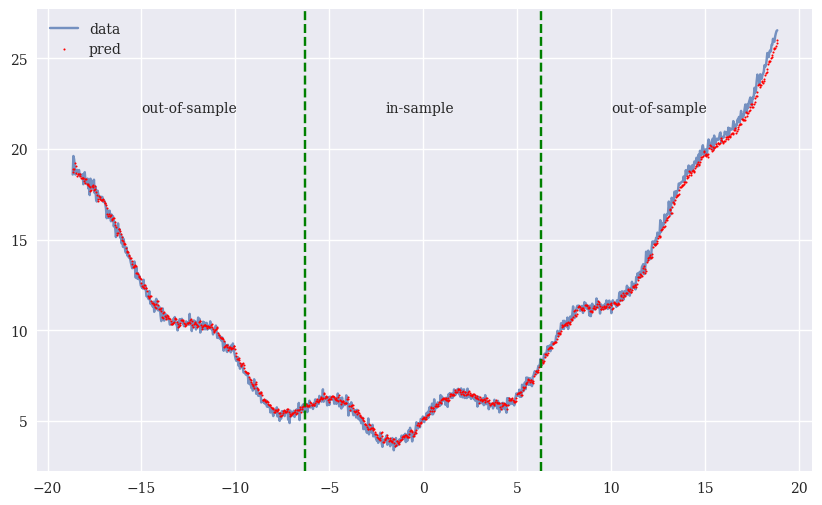

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend()

In [120]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [121]:
symbol = 'EUR_USD'

In [122]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)
raw

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-01 00:00:00,1.0899,1.0897,1.0897,1.0899
2019-10-01 00:01:00,1.0899,1.0896,1.0899,1.0898
2019-10-01 00:02:00,1.0898,1.0896,1.0898,1.0896
2019-10-01 00:03:00,1.0898,1.0896,1.0897,1.0898
2019-10-01 00:04:00,1.0898,1.0896,1.0897,1.0898
...,...,...,...,...
2019-12-31 22:11:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:01:00,1.1212,1.1211,1.1211,1.1211
2019-12-31 23:03:00,1.1212,1.1211,1.1212,1.1211


In [123]:
def generate_data():
    data = pd.DataFrame(raw['CLOSE'])
    data.columns = [symbol]
    data = data.resample('30min', label='right').last().ffill()
    return data

In [124]:
data = generate_data()

In [129]:
data = (data - data.mean()) / data.std()
data.shape

(4415, 1)

In [126]:
p = data[symbol].values

In [128]:
p = p.reshape((len(p), -1))
p.shape

(4415, 1)

In [130]:
lags = 5

In [131]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [133]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                     features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                            input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                       input_shape=(lags, features)))

    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

In [134]:
model = create_rnn_model()

In [135]:
model.fit_generator(g, epochs=500, steps_per_epoch=10, verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/303329838.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(g, epochs=500, steps_per_epoch=10, verbose=False)


In [136]:
y = model.predict(g, verbose=False)

In [137]:
data['pred'] = np.nan

In [138]:
data['pred'].iloc[lags:] = y.flatten()

In [140]:
y

array([[-2.9431],
       [-2.9499],
       [-2.9506],
       ...,
       [ 2.2554],
       [ 2.2901],
       [ 2.305 ]], dtype=float32)

In [139]:
data

,EUR_USD,pred
Date,,
2019-10-01 00:30:00,-2.711169,NaN
2019-10-01 01:00:00,-2.758273,NaN
2019-10-01 01:30:00,-2.821080,NaN
2019-10-01 02:00:00,-2.852483,NaN
2019-10-01 02:30:00,-2.915289,NaN
...,...,...
2019-12-31 21:30:00,2.203404,2.369656
2019-12-31 22:00:00,2.140598,2.322449
2019-12-31 22:30:00,2.187702,2.255414


<Axes: xlabel='Date'>

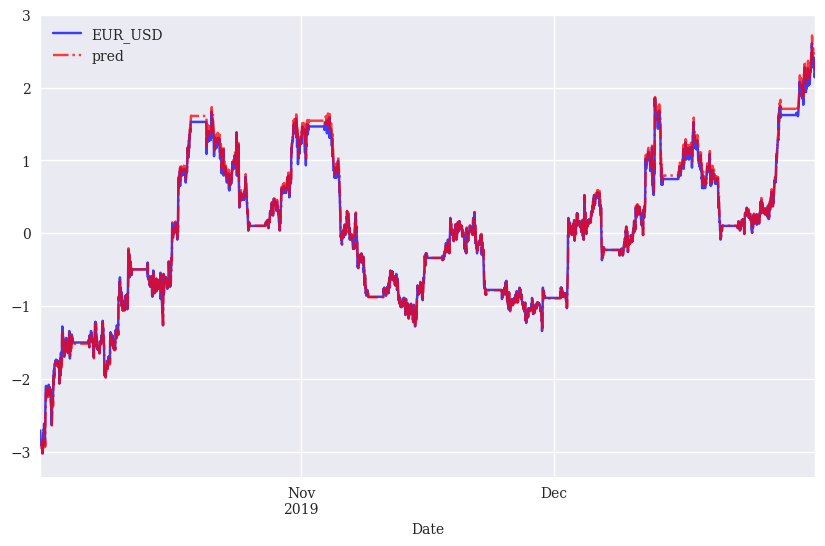

In [141]:
data[[symbol, 'pred']].plot(
    figsize=(10, 6), style=['b', 'r-.'],
    alpha=0.75
)

<Axes: xlabel='Date'>

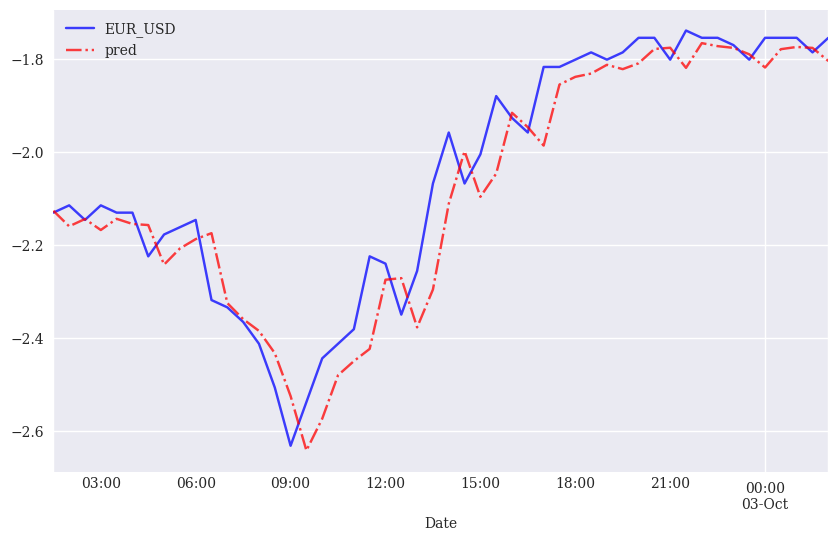

In [142]:
data[[symbol, 'pred']].iloc[50:100].plot(
    figsize=(10, 6), style=['b', 'r-.'],
    alpha=0.75
)

In [143]:
data = generate_data()

In [144]:
data['r'] = np.log(data / data.shift(1))

In [145]:
data.dropna(inplace=True)

In [146]:
data = (data - data.mean()) / data.std()

In [164]:
data['r']

Date
2019-10-01 03:30:00   -0.017915
2019-10-01 04:00:00    0.496771
2019-10-01 04:30:00    0.496676
2019-10-01 05:00:00   -0.275199
2019-10-01 05:30:00    0.239369
                         ...   
2019-12-31 21:30:00   -0.767465
2019-12-31 22:00:00   -1.017627
2019-12-31 22:30:00    0.731902
2019-12-31 23:00:00   -0.017915
2019-12-31 23:30:00   -0.017915
Freq: 30T, Name: r, Length: 4409, dtype: float64

In [149]:
r = data['r'].values
r.shape

(4414,)

In [150]:
r = r.reshape((len(r), -1))
r.shape

(4414, 1)

In [151]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)
g

In [152]:
model = create_rnn_model()

In [154]:
history = model.fit_generator(g, epochs=500, steps_per_epoch=10,
                    verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/2046340519.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=500, steps_per_epoch=10,


In [157]:
y = model.predict(g, verbose=False)
y

array([[-0.0195],
       [-0.0943],
       [-0.0319],
       ...,
       [ 0.0036],
       [-0.035 ],
       [-0.1541]], dtype=float32)

In [156]:
data['pred'] = np.nan

In [158]:
data['pred'].iloc[lags:] = y.flatten()

In [159]:
data.dropna(inplace=True)

<Axes: xlabel='Date'>

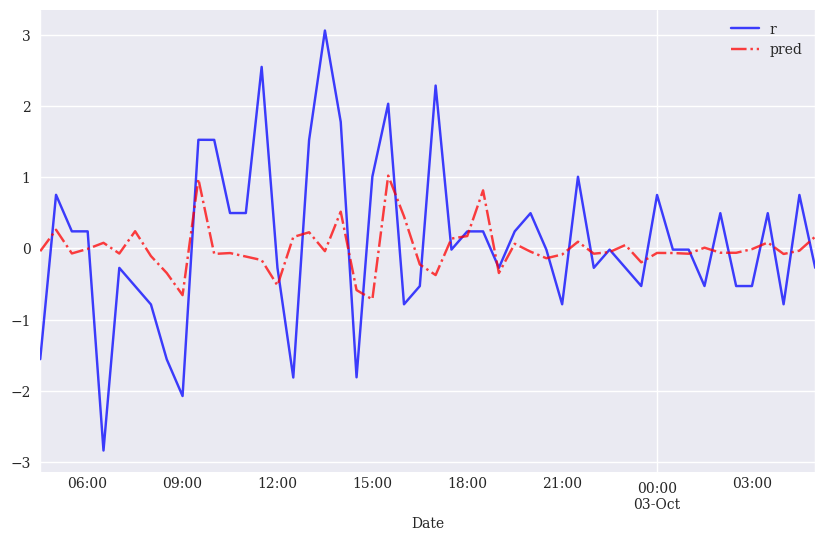

In [160]:
data[['r', 'pred']].iloc[50:100].plot(
    figsize=(10, 6), style=['b', 'r-.'],
    alpha=0.75
)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.6987979133590383

In [163]:
split = int(len(r) * 0.8)

In [165]:
train = r[:split]

In [166]:
test = r[split:]

In [167]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [168]:
set_seeds()

In [169]:
model = create_rnn_model(hu=100)

In [170]:
history = model.fit_generator(g, epochs=100, steps_per_epoch=10, verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/3559529465.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=100, steps_per_epoch=10, verbose=False)


In [171]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)

In [172]:
y = model.predict(g_)

176/176 [==============================] - 0s 423us/step


In [173]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.6788154897494305

In [174]:
data = generate_data()

In [175]:
data['r'] = np.log(data / data.shift(1))

In [176]:
window = 20

In [207]:
data.dropna(inplace=True)
data

,EUR_USD,r,mom,vol
Date,,,,
2019-10-01 10:30:00,1.0900,0.000734,0.000005,0.000388
2019-10-01 11:00:00,1.0899,-0.000092,0.000014,0.000383
2019-10-01 11:30:00,1.0905,0.000550,0.000060,0.000390
2019-10-01 12:00:00,1.0899,-0.000550,0.000041,0.000410
2019-10-01 12:30:00,1.0893,-0.000551,0.000032,0.000422
...,...,...,...,...
2019-12-31 21:30:00,1.1212,-0.000268,-0.000022,0.000469
2019-12-31 22:00:00,1.1208,-0.000357,-0.000089,0.000410
2019-12-31 22:30:00,1.1211,0.000268,-0.000071,0.000417


In [208]:
data['mom'] = data['r'].rolling(window).mean()

In [209]:
data['vol'] = data['r'].rolling(window).std()

In [211]:
data.dropna(inplace=True)

In [212]:
split = int(len(data) * 0.8)

In [213]:
train = data.iloc[:split].copy()

In [214]:
mu, std = train.mean(), train.std()

In [215]:
train = (train - mu) / std

In [216]:
test = data.iloc[split:].copy()

In [217]:
test = (test - mu) / std

In [218]:
train

,EUR_USD,r,mom,vol
Date,,,,
2019-10-01 20:00:00,-2.090423,-0.013064,2.759352,1.578278
2019-10-01 20:30:00,-2.141516,-0.756917,2.062826,1.560677
2019-10-01 21:00:00,-2.192609,-0.757121,1.936674,1.582403
2019-10-01 21:30:00,-2.192609,-0.013064,1.556585,1.554494
2019-10-01 22:00:00,-2.192609,-0.013064,1.936674,1.472937
...,...,...,...,...
2019-12-13 15:30:00,1.230628,-3.907451,-2.565175,0.993240
2019-12-13 16:00:00,1.247659,0.230499,-2.503138,1.002119
2019-12-13 16:30:00,1.043287,-2.937267,-2.815088,1.132201


In [219]:
g = TimeseriesGenerator(train.values, train['r'].values,
                        length=lags, batch_size=5)

In [220]:
g[0]

(array([[[-2.0904, -0.0131,  2.7594,  1.5783],
         [-2.1415, -0.7569,  2.0628,  1.5607],
         [-2.1926, -0.7571,  1.9367,  1.5824],
         [-2.1926, -0.0131,  1.5566,  1.5545],
         [-2.1926, -0.0131,  1.9367,  1.4729]],
 
        [[-2.1415, -0.7569,  2.0628,  1.5607],
         [-2.1926, -0.7571,  1.9367,  1.5824],
         [-2.1926, -0.0131,  1.5566,  1.5545],
         [-2.1926, -0.0131,  1.9367,  1.4729],
         [-2.1926, -0.0131,  2.317 ,  1.383 ]],
 
        [[-2.1926, -0.7571,  1.9367,  1.5824],
         [-2.1926, -0.0131,  1.5566,  1.5545],
         [-2.1926, -0.0131,  1.9367,  1.4729],
         [-2.1926, -0.0131,  2.317 ,  1.383 ],
         [-2.1926, -0.0131,  2.1902,  1.3885]],
 
        [[-2.1926, -0.0131,  1.5566,  1.5545],
         [-2.1926, -0.0131,  1.9367,  1.4729],
         [-2.1926, -0.0131,  2.317 ,  1.383 ],
         [-2.1926, -0.0131,  2.1902,  1.3885],
         [-2.2096, -0.2611,  2.1904,  1.3885]],
 
        [[-2.1926, -0.0131,  1.9367,  1.4729],
 

In [221]:
set_seeds()

In [222]:
model = create_rnn_model(hu=100, features=len(data.columns),
                         layer='SimpleRNN')

In [223]:
history = model.fit_generator(g, epochs=100, steps_per_epoch=10,
                    verbose=False)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/461719849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=100, steps_per_epoch=10,


In [224]:
history.history

{'loss': [1.0005968809127808,
  0.4885096848011017,
  1.4655894041061401,
  0.7433815598487854,
  0.4562062919139862,
  1.4341212511062622,
  0.5836859345436096,
  0.9045298099517822,
  1.2493510246276855,
  1.015943169593811,
  2.4960412979125977,
  1.1148285865783691,
  4.460027694702148,
  0.6593815684318542,
  1.9992965459823608,
  1.0569707155227661,
  1.142667531967163,
  1.3707149028778076,
  0.347610741853714,
  0.9884613752365112,
  1.692763090133667,
  0.7694336771965027,
  1.6461044549942017,
  1.7262269258499146,
  2.395557165145874,
  1.1956385374069214,
  0.8121781349182129,
  0.49861130118370056,
  1.2177205085754395,
  1.6401634216308594,
  1.4840642213821411,
  0.7983598113059998,
  1.6641119718551636,
  0.5370401740074158,
  0.7288780808448792,
  0.3694666922092438,
  0.4734160304069519,
  1.1106882095336914,
  0.634696364402771,
  1.2982525825500488,
  0.5534902811050415,
  1.4951978921890259,
  0.6756742000579834,
  0.6730647087097168,
  0.5316742062568665,
  1.1850

In [225]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)
list(g_)

[(array([[[ 0.9241, -2.2079, -3.1881,  1.3716],
          [ 0.9752,  0.7187, -3.5582,  1.2075],
          [ 0.9922,  0.2308, -3.5579,  1.2076],
          [ 1.0263,  0.4747, -3.31  ,  1.2428],
          [ 0.9922, -0.5008, -3.7433,  1.1444]],
  
         [[ 0.9752,  0.7187, -3.5582,  1.2075],
          [ 0.9922,  0.2308, -3.5579,  1.2076],
          [ 1.0263,  0.4747, -3.31  ,  1.2428],
          [ 0.9922, -0.5008, -3.7433,  1.1444],
          [ 0.9241, -0.9888, -4.0536,  1.1178]],
  
         [[ 0.9922,  0.2308, -3.5579,  1.2076],
          [ 1.0263,  0.4747, -3.31  ,  1.2428],
          [ 0.9922, -0.5008, -3.7433,  1.1444],
          [ 0.9241, -0.9888, -4.0536,  1.1178],
          [ 0.9241, -0.0131, -4.1154,  1.1051]],
  
         [[ 1.0263,  0.4747, -3.31  ,  1.2428],
          [ 0.9922, -0.5008, -3.7433,  1.1444],
          [ 0.9241, -0.9888, -4.0536,  1.1178],
          [ 0.9241, -0.0131, -4.1154,  1.1051],
          [ 1.0092,  1.2065, -3.8047,  1.1999]],
  
         [[ 0.9922, -0.5

In [226]:
y = model.predict(g_).flatten()
y

175/175 [==============================] - 0s 441us/step


array([-0.1104, -0.2653, -0.3647, -0.5895, -0.3478, -0.3381, -0.1586,
       -0.4513, -0.2003, -0.2578, -0.2552, -0.2486, -0.1151, -0.1825,
       -0.143 , -0.1451, -0.1334, -0.1391, -0.0925, -0.0968, -0.128 ,
       -0.1123, -0.088 , -0.0562, -0.0444, -0.0355, -0.0701, -0.0682,
       -0.0657, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642, -0.0642,
       -0.0642, -0.2855, -0.1562, -0.1002, -0.0737, -0.4331, -0.1653,
       -0.3168, -0.2

In [227]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.6762342135476463

In [228]:
set_seeds()

In [229]:
model = create_rnn_model(hu=50, features=len(data.columns),
                         layer='LSTM',
                         algorithm='classification')

In [230]:
train_y = np.where(train['r'] > 0, 1, 0)

In [232]:
np.bincount(train_y)

array([2369, 1131])

In [233]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [234]:
g = TimeseriesGenerator(train.values, train_y,
                        length=lags, batch_size=5)

In [235]:
history = model.fit_generator(g, epochs=5, steps_per_epoch=10, verbose=False, class_weight=cw(train_y))

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/1781134359.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=5, steps_per_epoch=10, verbose=False, class_weight=cw(train_y))


In [236]:
test_y = np.where(test['r'] > 0, 1, 0)

In [237]:
g_ = TimeseriesGenerator(test.values, test_y,
                         length=lags, batch_size=5)

In [238]:
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 0s 510us/step


In [240]:
np.bincount(y)

array([771, 100])

In [241]:
accuracy_score(test_y[lags:], y)

0.6670493685419059

In [242]:
from keras.layers import Dropout

In [243]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM

    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                    return_sequences=True))

    if dropout:
        model.add(Dropout(rate, seed=seed))

    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))

    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [244]:
set_seeds()

In [245]:
model = create_deep_rnn_model(
    hl=2, hu=50, layer='SimpleRNN',
    features=len(data.columns),
    dropout=True, rate=0.3
)

In [246]:
history = model.fit_generator(g, epochs=200, steps_per_epoch=10,
                              verbose=False, class_weight=cw(train_y))

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_7871/2459259350.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(g, epochs=200, steps_per_epoch=10,


In [247]:
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 0s 627us/step


In [249]:
np.bincount(y)

array([445, 426])

In [250]:
accuracy_score(test_y[lags:], y)

0.6142365097588978